<a href="https://colab.research.google.com/github/viswa0531/AlternusVera/blob/master/Biased_Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternus Vera 

Course code: **CMPE-257** 
    
Group name : **Drifters**
    
Name: **Viswanath Singh Kambam (012497524)** 

-----

GitHub URL: 


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).


### Process of my approach

1. Data Preprocessing
2. Visualization
3. Lemmatization
4. Stemming
5. Spell Check
6. Dictionary
7. LDA
8. Doc2Vec
9. TF-IDF
10. LDA using TF-IDF 
11. Sentiment analysis 
12. Rating 
13. Naive Bayes Classifier
14. Data enrichment
15. Vectorization 

### Feature Selection
**List top Features Selected based on research articles**

1. Sensationalism
2. Political Affiliation
3. Authenticity
4. Biased



### Team Contributions example:

|Features  |  Member |
|-----|-----|
| Sensationalism                         |  Paramdeep Saini |  
| Political Affiliation                |  Julian Simon | 
| Authenticity                   |  Rajalakshmi Babu  |   
| Biased or Slanted News                             |  Viswanath Singh Kambam |

 
#### Enrichment Dataset Details

- SenticNet5 sensational words corpus
- Sensational Words Dictionary 


#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 


#### What did I try and What worked? 

> Initially I preprocessed the given dataset using NLTK in-build libraries for tokenization, stopwords removal, stemming and lemmentization. Then I decided to visualize the cleaned data using WordCloud. I decided to extract compound features like Sentiment, Sensationalism and LDA Topic score and utilized it to classify the news document as fake or not.

#### What did not work?

> Using Speakers title alone as a feature did not yield a great result. If I analyze the data by taking sentiments into consideration then it gives the better result. The accuracy found by this model seems be at around 54% on average run for different algorithms such as Linear Regression, Random Forest, SVM and Naive Bayes. 


#### What alternatives did you try?

> I used the data enrichment downloaded from Uci-news-aggregator and integrated with LL dataset.
Applied Doc2vec algorthim
Applied MultinomialNB, Random forest, XGB, SVM etc. The Accuracy level is achieved around 60%. The news is whether real or fake is assessed by taking title of the speaker into account along with 4 factors (such as true, false, bare-truly and barely-false) that are associated with the dataset . 
Hence Bias factor = 0.63*(prediction from NB)
Accuracy has improved as compared to LL after data amlagamation. After new dataset, I got following result where accuracy has increased a very little bit

| Algorithim     | Accuracy            | Confusion Matrix    | Classification Report                                 |
|----------------:|--------------------:|--------------------:|------------------------------------------------------:|
| MultiNB        | 0.60468750          | [[2424 2064]        |               precision    recall  f1-score   support |
|                |                     |  [1984 3768]]       |                                                       |
|                |                     |                     |            0       0.55      0.54      0.54      4488 |
|                |                     |                     |            1       0.65      0.66      0.65      5752 |
|                |                     |                     |                                                       |
|                |                     |                     |     accuracy                           0.60     10240 |
|                |                     |                     |    macro avg       0.60      0.60      0.60     10240 |
|                |                     |                     | weighted avg       0.60      0.60      0.60     10240 |
|                |                     |                     |                                                       |
| -------------- | ------------------- | ------------------- | ---------------------------------------------------   |
| DescionTree    | 0.63359375          | [[1260 3228]        |               precision    recall  f1-score   support |
|                |                     |  [ 524 5228]]       |                                                       |
|                |                     |                     |            0       0.71      0.28      0.40      4488 |
|                |                     |                     |            1       0.62      0.91      0.74      5752 |
|                |                     |                     |                                                       |
|                |                     |                     |     accuracy                           0.63     10240 |
|                |                     |                     |    macro avg       0.66      0.59      0.57     10240 |
|                |                     |                     | weighted avg       0.66      0.63      0.59     10240 |
|                |                     |                     |                                                       |
| -------------- | ------------------- | ------------------- | ---------------------------------------------------   |
| Random Forest  | 0.63349609          | [[1197 3291]        |               precision    recall  f1-score   support |
|                |                     |  [ 462 5290]]       |                                                       |
|                |                     |                     |            0       0.72      0.27      0.39      4488 |
|                |                     |                     |            1       0.62      0.92      0.74      5752 |
|                |                     |                     |                                                       |
|                |                     |                     |     accuracy                           0.63     10240 |
|                |                     |                     |    macro avg       0.67      0.59      0.56     10240 |
|                |                     |                     | weighted avg       0.66      0.63      0.59     10240 |
|                |                     |                     |                                                       |
| -------------- | ------------------- | ------------------- | ---------------------------------------------------   |
| LogR_clf       | 0.61806641          | [[1011 3477]        |               precision    recall  f1-score   support |
|                |                     |  [ 434 5318]]       |                                                       |
|                |                     |                     |            0       0.70      0.23      0.34      4488 |
|                |                     |                     |            1       0.60      0.92      0.73      5752 |
|                |                     |                     |                                                       |
|                |                     |                     |     accuracy                           0.62     10240 |
|                |                     |                     |    macro avg       0.65      0.57      0.54     10240 |
|                |                     |                     | weighted avg       0.65      0.62      0.56     10240 |
|                |                     |                     |                                                       |
| -------------- | ------------------- | ------------------- | ---------------------------------------------------   |
| svm_Linear     | 0.62460938          | [[1101 3387]        |               precision    recall  f1-score   support |
|                |                     |  [ 457 5295]]       |                                                       |
|                |                     |                     |            0       0.71      0.25      0.36      4488 |
|                |                     |                     |            1       0.61      0.92      0.73      5752 |
|                |                     |                     |                                                       |
|                |                     |                     |     accuracy                           0.62     10240 |
|                |                     |                     |    macro avg       0.66      0.58      0.55     10240 |
|                |                     |                     | weighted avg       0.65      0.62      0.57     10240 |
|                |                     |                     |                                                       |
| -------------- | ------------------- | ------------------- | ---------------------------------------------------   |
| SVM_SGD        | 0.59365234          | [[ 600 3888]        |               precision    recall  f1-score   support |
|                |                     |  [ 273 5479]]       |                                                       |
|                |                     |                     |            0       0.69      0.13      0.22      4488 |
|                |                     |                     |            1       0.58      0.95      0.72      5752 |
|                |                     |                     |                                                       |
|                |                     |                     |     accuracy                           0.59     10240 |
|                |                     |                     |    macro avg       0.64      0.54      0.47     10240 |
|                |                     |                     | weighted avg       0.63      0.59      0.51     10240 |
|                |                     |                     |                                                       |
| -------------- | ------------------- | ------------------- | ---------------------------------------------------   |
| xgb_clf        | 0.59599609          | [[ 563 3925]        |               precision    recall  f1-score   support |
|                |                     |  [ 212 5540]]       |                                                       |
|                |                     |                     |            0       0.73      0.13      0.21      4488 |
|                |                     |                     |            1       0.59      0.96      0.73      5752 |
|                |                     |                     |                                                       |
|                |                     |                     |     accuracy                           0.60     10240 |
|                |                     |                     |    macro avg       0.66      0.54      0.47     10240 |
|                |                     |                     | weighted avg       0.65      0.60      0.50     10240 |
|                |                     |                     |                                                       |


In [0]:
## ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Data selection and observations

In [0]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
googleDrive = GoogleDrive(gauth)

In [345]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [346]:
train_link = "https://drive.google.com/open?id=1uYRl81ky2XUIrENCpmZr3IB_48cEuiWp"
fluff, id1 = train_link.split('=')
test_link = "https://drive.google.com/open?id=1_xQWkwm-ZD0NR824TH_eTyIYzW79uvyZ"
fluff, id2 = test_link.split('=')
valid_link = "https://drive.google.com/open?id=1gaS9R-PQvER5DE1dAgh7z6v4u_euIvrO"
fluff, id3 = valid_link.split('=')
train_biases = "https://drive.google.com/open?id=1Nwn3R1HDMCIj39K6HHyrsO87SkTlak9A"
fluff, id4 = train_biases.split('=')
train_bodies = "https://drive.google.com/open?id=1fo74P-p-zwqDNypVxefc0hch0UX-qdGg"
fluff, id5 = train_bodies.split('=')
ucinews = "https://drive.google.com/open?id=1tz6i1Y45GyubVYzzkBWDRnDZDkG6u8i1"
fluff, id6 = ucinews.split('=')
debate = "https://drive.google.com/open?id=1FHsPLiT2Fh3sxbm0J7cTLEDMBxgL2LBt"
fluff, id7 = debate.split("=")
debateFile = "https://drive.google.com/open?id=1X4Bu8LLRofDxMTICeMBXmJNaOb4r2m02"
fluff, id8 = debateFile.split("=")
print (id8) # Verify that you have everything after '='


1X4Bu8LLRofDxMTICeMBXmJNaOb4r2m02


### Load the dataset

In [0]:
test_filename = 'test.tsv'
train_filename = 'train.tsv'
valid_filename = 'valid.tsv'
train_bias = 'train_biases.csv'
train_body = 'train_bodies.csv'
uci_news = 'uci-news-aggregator.csv'
debate_news = 'debate.csv'

In [0]:
downloaded = googleDrive.CreateFile({'id':id1}) 
downloaded.GetContentFile(train_filename)  
downloaded = googleDrive.CreateFile({'id':id2}) 
downloaded.GetContentFile(test_filename)  
downloaded = googleDrive.CreateFile({'id':id3}) 
downloaded.GetContentFile(valid_filename)

downloaded = googleDrive.CreateFile({'id':id4}) 
downloaded.GetContentFile(train_bias)  
downloaded = googleDrive.CreateFile({'id':id5}) 
downloaded.GetContentFile(train_body)  
downloaded = googleDrive.CreateFile({'id':id6}) 
downloaded.GetContentFile(uci_news)
downloaded = googleDrive.CreateFile({'id':id8}) 
downloaded.GetContentFile(debate_news)



### Define Column names in Dataset

In [0]:
Colnames = ['Json_Id', 'Label', 'Statement', 'Subject', 'Speaker',
           'Speaker\'sJobTitle', 'StateInfo', 'partyAffiliation',
           'BarelyTrueCounts', 'FalseCounts','HalfTrueCounts',
           'MostlyTrueCounts','PantsOnFireCounts','Context']
#labelcolname = 'Label'
titlecolname = 'Speaker\'sJobTitle'

In [0]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
##Printing the rod cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS  #install $ pip install wordcloud

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(12.0,8.0), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    mp.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        mp.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        mp.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'top'})
    else:
        mp.imshow(wordcloud);
        mp.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    mp.axis('off');
    mp.tight_layout()  

In [0]:
def create_word_cloud(dataframe, colname, title):
    plot_wordcloud(dataframe[colname].dropna(),  max_words=300000, max_font_size=300, title=title)

### Reading the Dataset

In [352]:
train_news = pd.read_csv(train_filename, sep='\t', names = Colnames,error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = Colnames,error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = Colnames,error_bad_lines=False)

train_news.head()

,Json_Id,Label,Statement,Subject,Speaker,Speaker'sJobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


### Simplifying the label contents

In [353]:
true_labels = ['original','true','mostly-true','half-true']
false_labels = ['barely-true','false','pants-fire']
def simplify_label(input_label):
    if input_label in true_labels:
        return 1
    else:
        return 0
labelcolname = 'Encoded_Label'

train_news[labelcolname] = train_news.apply(lambda row: simplify_label(row['Label']), axis=1)
test_news[labelcolname] = test_news.apply(lambda row: simplify_label(row['Label']), axis=1)
valid_news[labelcolname] = valid_news.apply(lambda row: simplify_label(row['Label']), axis=1)
train_news.head()

,Json_Id,Label,Statement,Subject,Speaker,Speaker'sJobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context,Encoded_Label
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1


## Data Preprocessing
We will perform the following steps:

* All stopwords are removed.
* Words that have fewer than 3 characters are removed.
* Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
* Words are stemmed — words are reduced to their root form.
* Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

In [354]:
import string
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Remove Stopwords and shortwords using nltk stopwords

In [0]:
sw = stopwords.words('english')
#Remove stop words
def remove_stop_and_short_words(text):
    text = [word.lower() for word in text.split() if (word.lower() not in sw) and (len(word)>3)]
    return " ".join(text)

def remove_stop_and_short_words_new(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return " ".join(result)

### Perform lemmatization and Stemming process using WordNetLemmatizer

In [0]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

#Removes punctuations from text data
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

### Preprocess text function

In [0]:
def process_data(text):
    text = remove_stop_and_short_words_new(text)
    text = lemmatize_stemming(text)
    text = remove_punctuation(text)
    return text

def preprocess(text):
    #result =[]
    #result.append(process_data(text).split())
    return process_data(text).split()

### Just testing the preprocess 

In [358]:
print (process_data(train_news['Statement'][0]))
#process_data(train_news['Statement'][4])
preprocess(train_news['Statement'][4])

say anni list polit group support trimest abort demand


['econom', 'turnaround', 'start', 'term']

In [359]:
processedheadlinecolname = 'processed_Statement'

train_news['index'] = train_news.index
train_news[processedheadlinecolname] = train_news.apply(lambda row: process_data(row['Statement']), axis=1)
train_news.head()

test_news['index'] = test_news.index
test_news[processedheadlinecolname] = test_news.apply(lambda row: process_data(row['Statement']), axis=1)
test_news.head()

valid_news['index'] = valid_news.index
valid_news[processedheadlinecolname] = valid_news.apply(lambda row: process_data(row['Statement']), axis=1)
valid_news.head()

,Json_Id,Label,Statement,Subject,Speaker,Speaker'sJobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context,Encoded_Label,index,processed_Statement
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,0,american work
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,1,obama swear offic holi bibl instead kuran equi...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,2,say have organ parad social welfar organ invol...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,3,say near half oregon children poor
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,4,attack republican program econom stimulus plan...


### Displaying the Speaker's Job Title data in different format using WordCloud
This gives us the better display of the contents of column 

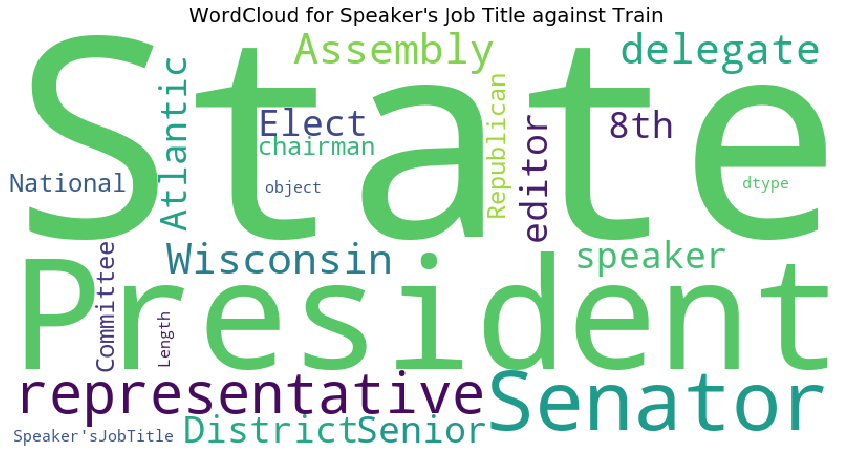

In [360]:
create_word_cloud(train_news,'Speaker\'sJobTitle','WordCloud for Speaker\'s Job Title against Train')

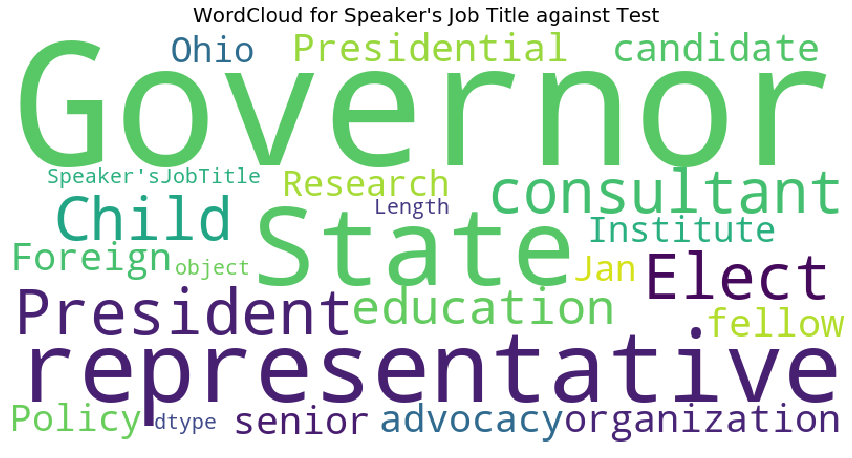

In [361]:
create_word_cloud(test_news,'Speaker\'sJobTitle','WordCloud for Speaker\'s Job Title against Test')

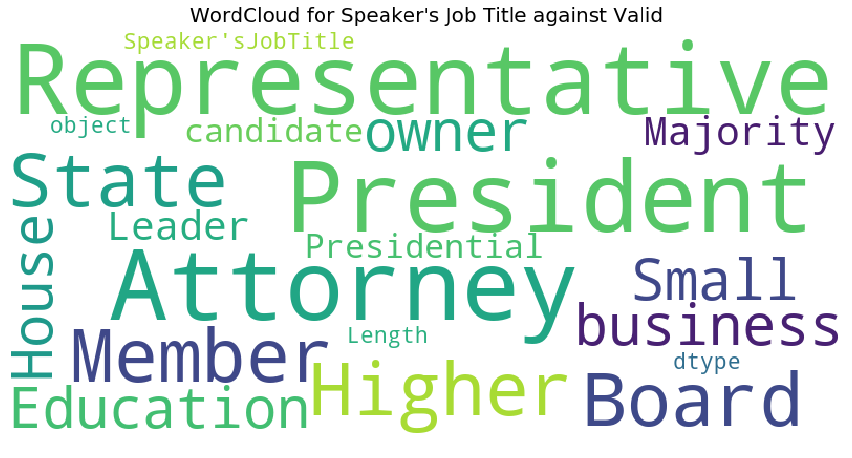

In [362]:
create_word_cloud(valid_news,'Speaker\'sJobTitle','WordCloud for Speaker\'s Job Title against Valid')

In [0]:
train_news.to_csv("/content/gdrive/My Drive/Drifters/Dataset/Drifters_BiasedOrSlanted/Enriched_data/train_cleantext.csv", sep=',')
test_news.to_csv("/content/gdrive/My Drive/Drifters/Dataset/Drifters_BiasedOrSlanted/Enriched_data/test_cleantext.csv", sep=',')
valid_news.to_csv("/content/gdrive/My Drive/Drifters/Dataset/Drifters_BiasedOrSlanted/Enriched_data/valid_cleantext.csv", sep=',')

### Column choosed for Biased Factor

chose Speakers job title as a parameter to find information that how much job title can affect the label values.For example if the Job title is Senaotor, then the graph between speakers job title vs label verifies whether speaker is saying the truth or not

In [0]:
#X_train=train_news["Speaker'sJobTitle"]
#Y_train=train_news["Label"]
X_train=train_news[titlecolname]
Y_train = train_news[labelcolname]

In [365]:
X_train


0                                 State representative
1                                       State delegate
2                                            President
3                                                  NaN
4                                                  NaN
                             ...                      
10235                                              NaN
10236                                              NaN
10237                                              NaN
10238                                              NaN
10239    chairman of the Republican National Committee
Name: Speaker'sJobTitle, Length: 10240, dtype: object

#### Exploring data through cross tabulation

In [0]:
CrossTab = pd.crosstab(X_train,Y_train,margins=True)

In [367]:
CrossTab.sort_values('All', ascending=False)

Encoded_Label,0,1,All
Speaker'sJobTitle,,,
All,3079,4264,7343
President,132,360,492
U.S. Senator,144,335,479
Governor,174,217,391
President-Elect,201,72,273
...,...,...,...
"Director, Sustainable Water Infrastructure Program, Ceres",0,1,1
"Director, Georgia C.A.R.E.",1,0,1
"President, Milwaukee Bucks",1,0,1


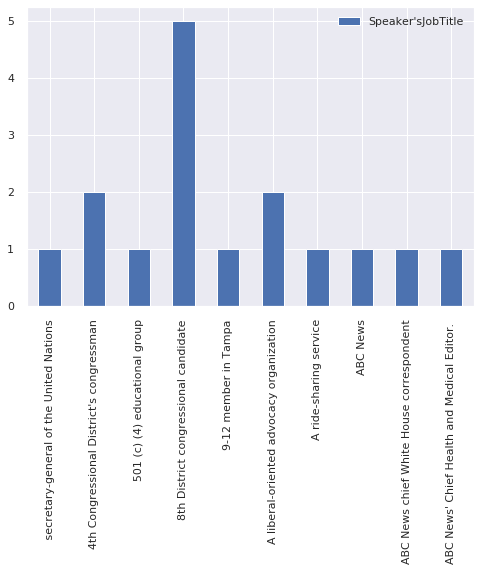

In [368]:
fig, ax = plt.subplots()
ax1 = X_train.value_counts().sort_index(ascending=True).head(10).plot('bar', ax=ax, legend=True)

In [369]:
CrossTab.head()

Encoded_Label,0,1,All
Speaker'sJobTitle,,,
secretary-general of the United Nations,0,1,1
4th Congressional District's congressman,1,1,2
501 (c) (4) educational group,0,1,1
8th District congressional candidate,1,4,5
9-12 member in Tampa,1,0,1


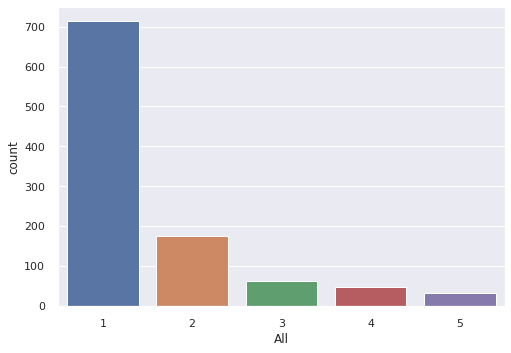

In [370]:
import seaborn as sns
sns.countplot(x="All", data=CrossTab,order=CrossTab["All"].value_counts().iloc[:5].index)
plt.show()

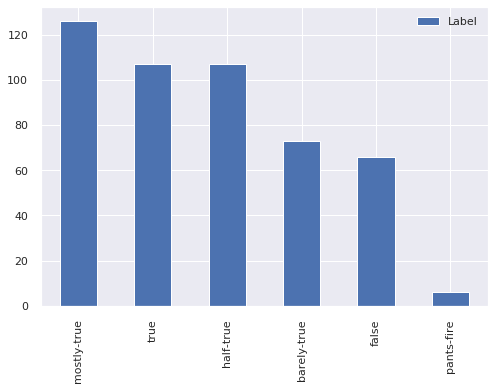

In [371]:
#By changing the value here for column we can check as per job title whats the probability of speaker lying
#This is specific example for U.S. Senator
import numpy as np
values_for_true = np.column_stack([train_news[Colnames].str.contains("U.S. Senator") for Colnames in ['Speaker\'sJobTitle']])
#print (values_for_true)
unique, counts = np.unique(values_for_true, return_counts=True)
dict(zip(unique, counts))
train_news['values_for_true'] = values_for_true
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = train_news[train_news['values_for_true']==True]['Label'].value_counts().plot('bar', ax=ax, legend=True)

In [372]:
#Setting NAN to No Job Title under Speaker's Job Title
X_train = X_train.replace(np.nan,'No Job Title', regex=True)
X_train

0                                 State representative
1                                       State delegate
2                                            President
3                                         No Job Title
4                                         No Job Title
                             ...                      
10235                                     No Job Title
10236                                     No Job Title
10237                                     No Job Title
10238                                     No Job Title
10239    chairman of the Republican National Committee
Name: Speaker'sJobTitle, Length: 10240, dtype: object

### Select a document to preview after prepocessing

In [373]:
#checking the sample document 
doc_sample = train_news[train_news['Json_Id'] == '2635.json']["Statement"][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))
#print(process_data(doc_sample))

original document: 
['Says', 'the', 'Annies', 'List', 'political', 'group', 'supports', 'third-trimester', 'abortions', 'on', 'demand.']


 tokenized and lemmatized document: 
['say', 'anni', 'list', 'polit', 'group', 'support', 'trimest', 'abort', 'demand']


### Preprocess the headline text, saving the results as ‘processed_docs'

In [374]:
processed_docs = train_news['Statement'].map(preprocess)
processed_docs[:10]

0    [say, anni, list, polit, group, support, trime...
1    [declin, coal, start, start, natur, take, star...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
4                    [econom, turnaround, start, term]
5    [chicago, bear, start, quarterback, year, tota...
6               [dunnam, live, district, repres, year]
7    [person, stage, work, activ, year, pass, russ,...
8    [take, million, oregon, lotteri, fund, port, n...
9    [say, primari, oppon, glenn, grothman, leibham...
Name: Statement, dtype: object

### Bag of Words on the Data set
Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set

In [375]:
#processed docs->getting words
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin


In [376]:
#printing actual dictionary
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print(dictionary)

Dictionary(1078 unique tokens: ['abort', 'demand', 'group', 'list', 'polit']...)


In [377]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10][0]

(24, 2)

In [378]:
#checking word frequency count
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))
print(len(bow_corpus))

Word 7 ("administr") appears 1 time.
Word 84 ("economi") appears 1 time.
Word 128 ("scott") appears 1 time.
Word 129 ("walker") appears 1 time.
Word 184 ("member") appears 2 time.
Word 254 ("job") appears 1 time.
Word 279 ("public") appears 1 time.
Word 326 ("hear") appears 1 time.
Word 547 ("charg") appears 1 time.
Word 799 ("talk") appears 1 time.
Word 1031 ("field") appears 1 time.
10240


In [0]:
#applying tf-idf and LDA
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [380]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3397402827336795),
 (1, 0.5002880765433487),
 (2, 0.4088224168287155),
 (3, 0.4639566513984633),
 (4, 0.40750764496407926),
 (5, 0.10879086838115597),
 (6, 0.27202739591951525)]


### Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’. 
For each topic, we will explore the words occuring in that topic and its relative weight.

In [381]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.035*"say" + 0.018*"obama" + 0.018*"million" + 0.016*"american" + 0.013*"state" + 0.011*"year" + 0.011*"job" + 0.011*"presid" + 0.010*"vote" + 0.009*"campaign"
Topic: 1 
Words: 0.037*"state" + 0.029*"year" + 0.022*"say" + 0.013*"texa" + 0.011*"peopl" + 0.010*"immigr" + 0.010*"school" + 0.009*"unit" + 0.008*"georgia" + 0.007*"averag"
Topic: 2 
Words: 0.025*"say" + 0.015*"health" + 0.014*"care" + 0.013*"trump" + 0.013*"dont" + 0.012*"support" + 0.012*"american" + 0.011*"state" + 0.010*"donald" + 0.009*"texa"
Topic: 3 
Words: 0.021*"obama" + 0.018*"say" + 0.012*"vote" + 0.012*"state" + 0.011*"time" + 0.011*"forc" + 0.010*"florida" + 0.010*"presid" + 0.010*"percent" + 0.009*"servic"
Topic: 4 
Words: 0.044*"say" + 0.019*"year" + 0.016*"state" + 0.016*"fund" + 0.015*"care" + 0.013*"school" + 0.012*"budget" + 0.011*"health" + 0.011*"offic" + 0.011*"million"
Topic: 5 
Words: 0.076*"say" + 0.027*"year" + 0.023*"presid" + 0.022*"obama" + 0.016*"billion" + 0.013*"barack" + 0.012

In [382]:
#LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.014*"say" + 0.011*"year" + 0.008*"go" + 0.008*"dollar" + 0.008*"obama" + 0.008*"state" + 0.007*"spend" + 0.007*"senat" + 0.007*"job" + 0.007*"dont"
Topic: 1 Word: 0.014*"say" + 0.009*"job" + 0.008*"percent" + 0.008*"democrat" + 0.008*"american" + 0.008*"vote" + 0.008*"month" + 0.007*"health" + 0.007*"creat" + 0.007*"island"
Topic: 2 Word: 0.019*"tax" + 0.017*"billion" + 0.016*"rais" + 0.013*"say" + 0.012*"job" + 0.011*"million" + 0.010*"percent" + 0.010*"obama" + 0.010*"year" + 0.010*"state"
Topic: 3 Word: 0.013*"health" + 0.013*"say" + 0.011*"care" + 0.010*"state" + 0.010*"support" + 0.010*"texa" + 0.010*"year" + 0.008*"rick" + 0.007*"georgia" + 0.007*"fund"
Topic: 4 Word: 0.017*"say" + 0.013*"year" + 0.012*"spend" + 0.009*"school" + 0.008*"percent" + 0.008*"texa" + 0.007*"trump" + 0.007*"state" + 0.007*"abort" + 0.006*"student"
Topic: 5 Word: 0.016*"state" + 0.010*"unit" + 0.010*"say" + 0.010*"year" + 0.010*"budget" + 0.010*"countri" + 0.008*"govern" + 0.008*"economi

In [383]:
processed_docs[4310]

['member',
 'public',
 'charg',
 'hear',
 'scott',
 'walker',
 'dozen',
 'member',
 'administr',
 'talk',
 'job',
 'economi',
 'lambeau',
 'field']

#### Performance evaluation by classifying sample document using LDA Bag of Words model
We will check where our test document would be classified.

In [384]:
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6100305914878845	 
Topic: 0.069*"say" + 0.028*"percent" + 0.018*"vote" + 0.018*"tax" + 0.017*"state" + 0.016*"clinton" + 0.013*"rais" + 0.013*"hillari" + 0.011*"go" + 0.011*"republican"

Score: 0.2899485230445862	 
Topic: 0.025*"say" + 0.015*"health" + 0.014*"care" + 0.013*"trump" + 0.013*"dont" + 0.012*"support" + 0.012*"american" + 0.011*"state" + 0.010*"donald" + 0.009*"texa"

Score: 0.012503624893724918	 
Topic: 0.076*"say" + 0.027*"year" + 0.023*"presid" + 0.022*"obama" + 0.016*"billion" + 0.013*"barack" + 0.012*"scott" + 0.010*"state" + 0.010*"million" + 0.009*"govern"

Score: 0.012503416277468204	 
Topic: 0.034*"year" + 0.033*"health" + 0.019*"percent" + 0.017*"care" + 0.017*"insur" + 0.016*"plan" + 0.015*"say" + 0.015*"spend" + 0.013*"senat" + 0.013*"american"

Score: 0.012503277510404587	 
Topic: 0.021*"obama" + 0.018*"say" + 0.012*"vote" + 0.012*"state" + 0.011*"time" + 0.011*"forc" + 0.010*"florida" + 0.010*"presid" + 0.010*"percent" + 0.009*"servic"

Score: 0.0125

### Performance Evaluation by classifying sample document using LDA TF-IDF model

In [385]:
for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.7134698033332825	 
Topic: 0.017*"say" + 0.013*"year" + 0.012*"spend" + 0.009*"school" + 0.008*"percent" + 0.008*"texa" + 0.007*"trump" + 0.007*"state" + 0.007*"abort" + 0.006*"student"

Score: 0.18650200963020325	 
Topic: 0.012*"say" + 0.011*"percent" + 0.010*"florida" + 0.008*"rate" + 0.007*"state" + 0.007*"vote" + 0.007*"near" + 0.007*"obama" + 0.006*"wisconsin" + 0.006*"countri"

Score: 0.01250749733299017	 
Topic: 0.014*"say" + 0.009*"state" + 0.009*"peopl" + 0.008*"texa" + 0.007*"year" + 0.006*"live" + 0.006*"vote" + 0.006*"school" + 0.006*"famili" + 0.006*"percent"

Score: 0.012504777871072292	 
Topic: 0.013*"health" + 0.013*"say" + 0.011*"care" + 0.010*"state" + 0.010*"support" + 0.010*"texa" + 0.010*"year" + 0.008*"rick" + 0.007*"georgia" + 0.007*"fund"

Score: 0.012504168786108494	 
Topic: 0.012*"say" + 0.011*"secur" + 0.010*"social" + 0.010*"percent" + 0.008*"parti" + 0.007*"privat" + 0.007*"year" + 0.007*"republican" + 0.007*"want" + 0.007*"go"

Score: 0.0125039592

### MultinomialNB classifier

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=preprocess)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

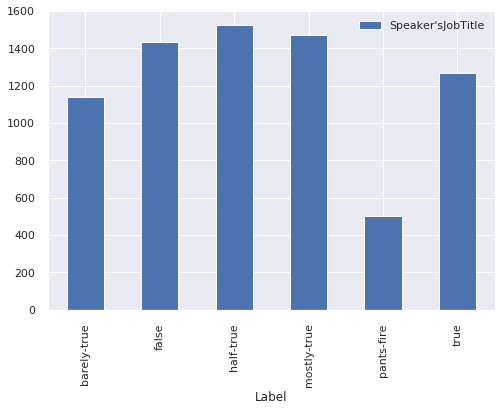

In [387]:
#dfTwoCols= train_news[['Label','Subject']]
dfTwoCols= train_news[['Label','Speaker\'sJobTitle']]
dfTwoCols.groupby("Label").count().plot(kind='bar')

In [388]:
dfTwoCols['verdict'] = dfTwoCols['Label'].map({'false': 0, 'true': 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols

,Label,Speaker'sJobTitle,verdict
0,false,State representative,0
1,half-true,State delegate,1
2,mostly-true,President,1
3,false,NaN,0
4,half-true,NaN,1
...,...,...,...
10235,mostly-true,NaN,1
10236,mostly-true,NaN,1
10237,half-true,NaN,1
10238,false,NaN,0


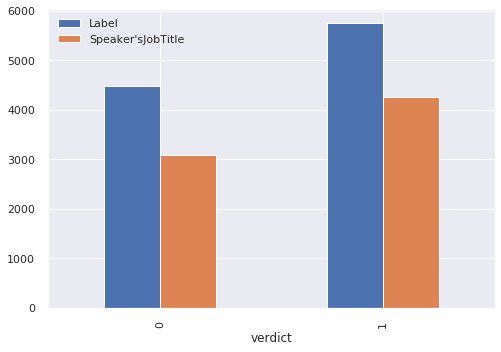

In [389]:
dfTwoCols.groupby("verdict").count().plot(kind='bar')

In [390]:
ct1=pd.crosstab(dfTwoCols["Speaker\'sJobTitle"],dfTwoCols["verdict"],margins=True)
ct1.sort_values('All', ascending=False)

verdict,0,1,All
Speaker'sJobTitle,,,
All,3079,4264,7343
President,132,360,492
U.S. Senator,144,335,479
Governor,174,217,391
President-Elect,201,72,273
...,...,...,...
"Director, Sustainable Water Infrastructure Program, Ceres",0,1,1
"Director, Georgia C.A.R.E.",1,0,1
"President, Milwaukee Bucks",1,0,1


Here we can see especially in the exceptional case of candidates-biography, social security that there is more false news than true. Now that we have some information we can proceed find more information by processing the text to find unique values in subjects. Also by visualization we can observe that sensational news will have extremely polarised graphs. Applying data preprocessing for NLP processing like tokeninsing, stemming etc



In [391]:
#print(bow_corpus)
class_train=np.array(dfTwoCols["verdict"])
print(class_train)
class_train=class_train.reshape(-1,1)
print(class_train)

pipeline.fit(train_news['Statement'],class_train)

[0 1 1 ... 1 0 0]
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function preprocess at 0x7f47659ef6a8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [392]:
#test
#dfs_test = pd.read_excel("input")
msg_test=test_news["Statement"]
dfTwoCols_test= test_news[['Label','Subject']]
dfTwoCols_test['verdict'] = dfTwoCols_test['Label'].map({'false': 0, 'true': 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols_test
class_test=np.array(dfTwoCols_test["verdict"])
print(class_test)
class_test=class_test.reshape(-1,1)
print(class_test)
predictions = pipeline.predict(msg_test)

[1 0 0 ... 0 0 0]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [393]:
print(classification_report(class_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.30      0.41       553
           1       0.61      0.86      0.72       714

    accuracy                           0.62      1267
   macro avg       0.62      0.58      0.56      1267
weighted avg       0.62      0.62      0.58      1267



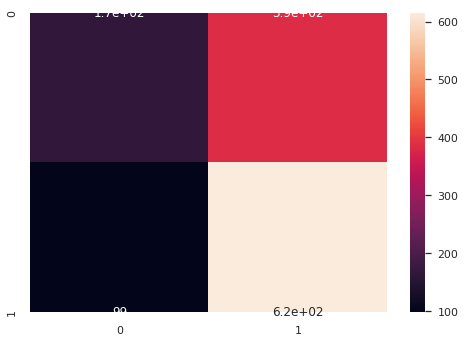

In [394]:
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)
# references: https://www.kaggle.com/astandrik/simple-spam-filter-using-naive-bayes

## Classifiers

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer

#### CounterVectorizer & Stats

In [0]:
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['Statement'].values)
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])

In [397]:
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])
    
get_tfidf_stats()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Tfidfvectorizer compute the word counts, idf and tf-idf values all at once

In [0]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

### Data Amalgamation

In [400]:
dataset_stances2 = pd.read_csv(train_bias, sep=',')
dataset_body2 = pd.read_csv(train_body, sep=',')
UCI_Aggregator_load = pd.read_csv(uci_news,sep=',')
UCI_Aggregator = UCI_Aggregator_load.dropna(how='any')
UCI_Aggregator.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


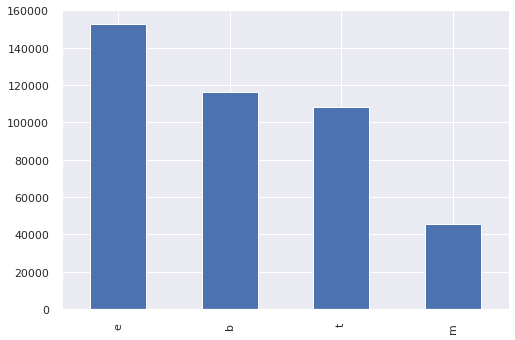

In [401]:
UCI_Aggregator['CATEGORY'].value_counts().plot(kind="bar")
plt.show()

# train/test data split
from sklearn.model_selection import train_test_split
train, test = train_test_split(UCI_Aggregator, test_size=0.2)

### Fakeness impact based on the claim stance
1. agree = 0 (If most of the claims agree with the news, the news is possibly not fake) 
2. disagree = 1 (If most of the claims disagree with the news, the news is possibly fake)
3. discuss = 0.5 (If there is a lot of discussion happening around, the news may or may not be fake)
4. unrealted = 1 (If the stances are mostly unrealted, the news will most likely be fake)

#### Create a doc2vec model for the training dataset

In [402]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(dataset_body2['articleBody'])]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Iterations for the Model
With the new datasource, we perform about 60 iterations to perfect the model.

In [403]:
max_epochs = 60
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,total_examples=model.corpus_count,epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

savedModel = "/content/gdrive/My Drive/Drifters/Models/Biased.model"
model.save(savedModel)
print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
Model Saved


#### Validation
This fucntion will scrape the fakenewschallenge dataset to get claims for all the news articles present in new aggregator dataset.
Once the relevant claims are found a new dataset will be returned which will have just the required details like news article and respective claims

In [0]:
from gensim.models.doc2vec import Doc2Vec
def get_claims():
    #model= Doc2Vec.load("d2v.model")
    model = Doc2Vec.load(savedModel)
    dataset_body2['index'] = dataset_body2.index
    count=1
    uci_news=0
    fnc_news_body_index=0
    for i in range(14204, 400000):
        claim1=UCI_Aggregator['TITLE'][i]
        claim1.lower()
        new_test_data = word_tokenize(claim1.lower())
        v2 = model.infer_vector(new_test_data)
        similar_documents = model.docvecs.most_similar([v2], topn = 1)
        myarray = np.asarray(similar_documents)
        new_a=myarray.squeeze()
        similarity_score=new_a[1]
        article_id = new_a[0]
        if float(similarity_score) > 0.95:
            #print ("{}".format(count))
            #print ("At index {}, Claim - {}".format(i, claim1))
            uci_news = i
            #print("** Similar news articles **")
            #print(dataset_body2.loc[dataset_body2['index'] == int(new_a[0]), 'articleBody'])
            fnc_news_body_index = int(new_a[0])
            count+=1
    UCI_Aggregator['TITLE'][uci_news]
    dataset_body2['articleBody'][fnc_news_body_index]
    Body_ID = dataset_body2.loc[dataset_body2['index'] == fnc_news_body_index, 'Body ID']
    new_df = dataset_stances2[dataset_stances2['Body ID'] == int(Body_ID)]
    new_df2 = new_df.join(new_df['Stance'].str.get_dummies())
    return new_df2

### Analyse the biase or stance from new data set

In [405]:
def stance_check():
    df = get_claims()
    arr=df['Stance'].value_counts().index
    for i in arr:
        print(i)
        if i == 'discuss':
            Stance_check=0.5
        elif i == 'agree':
            Stance_check=0
        elif i == 'disagree':
            Stance_check=1
        else:
            Stance_check=1
    return Stance_check
stance_check()

0.5

#### Model Validation
Once the iterations are complete, we now test the model by feeding a new statement into the model testing its accuracy

In [406]:
#testing for a text
from gensim.models.doc2vec import Doc2Vec
text = "A aqi men served her what she thought was meat and rice, but it was something else entirely."
model= Doc2Vec.load(savedModel)
#to find the vector of a document which is not in training data
test_data = word_tokenize(text)
v1 = model.infer_vector(test_data)
similar_doc = model.docvecs.most_similar([v1])
print(similar_doc[0][0])
#test_sentence= [model.infer_vector(word_tokenize(text))]
#print (test_sentence)

1180


In [407]:
titleCol=[]
for row in train_news[titlecolname]:
    try:        
        test_data = word_tokenize(row.lower())
        v1 = model.infer_vector(test_data)
        similar_doc = model.docvecs.most_similar([v1])
        titleCol.append(similar_doc[0][0])
    except:
        pass
sourceCol=list(map(int, titleCol))
train_news['titleCol_new']=pd.Series(titleCol)
train_news.head()

,Json_Id,Label,Statement,Subject,Speaker,Speaker'sJobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context,Encoded_Label,index,processed_Statement,values_for_true,titleCol_new
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0,0,say anni list polit group support trimest abor...,False,613
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,1,declin coal start start natur take start begin...,False,1071
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1,2,hillari clinton agre john mccain vote georg bu...,False,586
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0,3,health care reform legisl like mandat free cha...,NaN,388
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1,4,econom turnaround start term,NaN,1409


In [408]:
titleCol=[]
for row in test_news[titlecolname]:
    try:
        
        test_data = word_tokenize(row.lower())
        v1 = model.infer_vector(test_data)
        similar_doc = model.docvecs.most_similar([v1])
        titleCol.append(similar_doc[0][0])
    except:
        pass
sourceCol=list(map(int, titleCol))
test_news['titleCol_new']=pd.Series(titleCol)
test_news.head()

,Json_Id,Label,Statement,Subject,Speaker,Speaker'sJobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context,Encoded_Label,index,processed_Statement,titleCol_new
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,1,0,build wall mexico border liter year,1274
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,0,1,wisconsin pace doubl number layoff year,327
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,0,2,say john mccain help vet,680
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,1,3,suzann bonamici support plan choic medicar adv...,1578
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,0,4,ask report center crimin scheme violat campaig...,178


In [0]:
X_test=train_news[titlecolname]
Y_test = train_news[labelcolname]
X_test =  X_test.replace(np.nan,'No Job Title', regex=True)

### Finding the Accuracy of the model using different classification algorithms

In [0]:
def code_pipeline(cv, counterV, clsf, clsf_object, x_train, y_train, x_test, y_test):
  pipe = Pipeline([(cv, counterV), (clsf, clsf_object)])
  pipe.fit(x_train, y_train)
  predict = pipe.predict(x_test)
  cls_report=classification_report(y_test,predict)
  cnfmtx=confusion_matrix(y_test,predict)
  mse=mean_squared_error(y_test, predict)
  mae=mean_absolute_error(y_test, predict)
  msse=np.sqrt(mean_squared_error(y_test, predict))
  return np.mean(predict == y_test), cls_report, cnfmtx, mse, mae, msse, pipe

In [0]:
dictOfPipes = {}

In [418]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from prettytable import PrettyTable
#funcDict = {"DescionTree": DecisionTreeClassifier(),"Randon Forest": RandomForestClassifier(n_estimators=100)} #,"naive Bayes": GaussianNB(),"SVC": SVC()}
funcDict = {"MultiNB": MultinomialNB(), "DescionTree": DecisionTreeClassifier(),"Random Forest": RandomForestClassifier(n_estimators=100), "LogR_clf":LogisticRegression(), 
            "svm_Linear": svm.LinearSVC(), "SVM_SGD": SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3), "xgb_clf": XGBClassifier()}
#p = PrettyTable(["Algorithim", "Accuracy","Confusion Matrix", "Mean Squared Error","Mean Absolute Error" ,"MSSE","Classification Report"])
p = PrettyTable(["Algorithim", "Accuracy","Confusion Matrix","Classification Report"])
p.padding_width = 1
p.float_format='.8'
for key in p.align.keys():
    p.align[key] = 'l'

for key,value1 in funcDict.items():
    data,cls_report,cfs1,mse,mae,msse, pipe = code_pipeline('PIPELINE', CountVectorizer(), 'nb_clf', value1, X_train, Y_train, X_test, Y_test)
    dictOfPipes[key] = pipe
    #p.add_row([key,data,cfs1,mse,mae,msse,cls_report])
    #p.add_row(["---","---","---","---","---","---","---"])
    #p.add_row(["--------------","-------------------","-------------------","----------------------","-----------------------","------------------","-------------------------------------------------------"])
    p.add_row([key,data,cfs1,cls_report])
    p.add_row(["--------------","-------------------","-------------------","---------------------------------------------------"])  
print(p)

+----------------+---------------------+---------------------+-------------------------------------------------------+
| Algorithim     | Accuracy            | Confusion Matrix    | Classification Report                                 |
+----------------+---------------------+---------------------+-------------------------------------------------------+
| MultiNB        | 0.60468750          | [[2424 2064]        |               precision    recall  f1-score   support |
|                |                     |  [1984 3768]]       |                                                       |
|                |                     |                     |            0       0.55      0.54      0.54      4488 |
|                |                     |                     |            1       0.65      0.66      0.65      5752 |
|                |                     |                     |                                                       |
|                |                     |        

#### Building Heatmaps for classification Algorithms

In [0]:
def build_confusion_matrix(classifier, name):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0],[0,0]])
    val= []
    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind][titlecolname].dropna() 
        train_y = train_news.iloc[train_ind][labelcolname].dropna()
    
        test_text = train_news.iloc[test_ind][titlecolname].dropna()
        test_y = train_news.iloc[test_ind][labelcolname].dropna()
        
        classifier.fit(train_text,train_y[0:len(train_text)])
        predictions = classifier.predict(test_text)
        confusion += confusion_matrix(test_y[0:len(predictions)],predictions)
        score = f1_score(test_y[0:len(predictions)],predictions)
        scores.append(score)
    
    print('Total statements classified:{}'.format(len(train_news)))
    print('Score:{}'.format(sum(scores)/len(scores)))
    print('Score length:{}'.format(len(scores)))
    cm = confusion
    #sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix ' + name, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Total statements classified:10240
Score:0.6728445613906109
Score length:5


Total statements classified:10240
Score:0.6543351582811461
Score length:5


Total statements classified:10240
Score:0.6662877888485613
Score length:5


Total statements classified:10240
Score:0.6784570027863126
Score length:5


Total statements classified:10240
Score:0.6706968258560283
Score length:5


Total statements classified:10240
Score:0.7026562246368689
Score length:5


Total statements classified:10240
Score:0.710042134135614
Score length:5




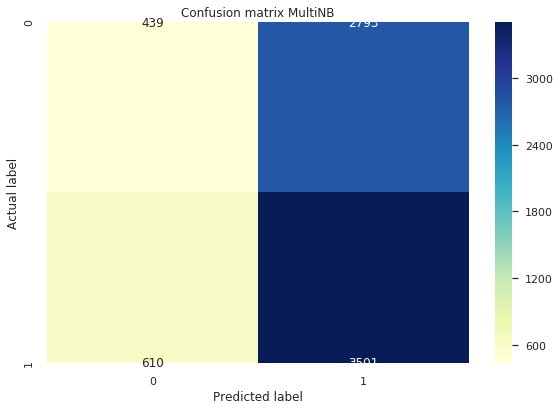

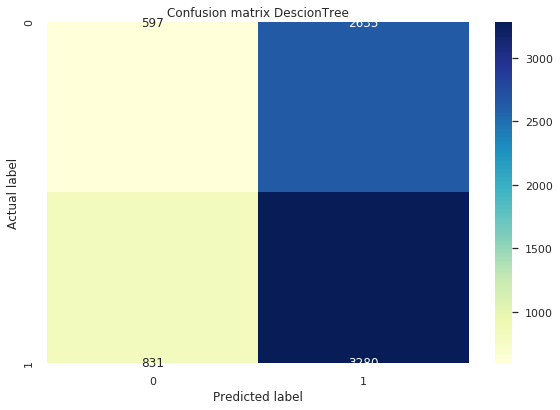

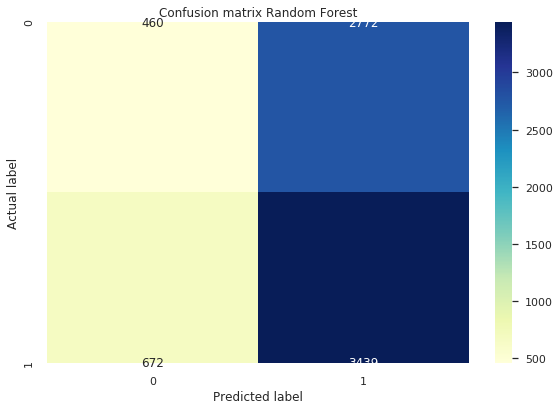

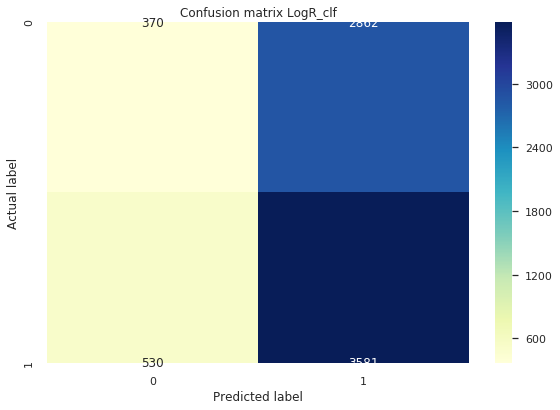

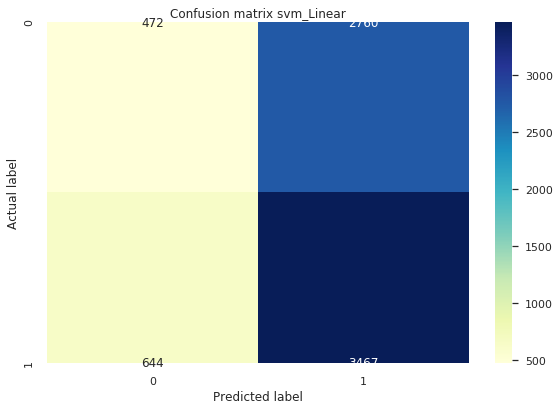

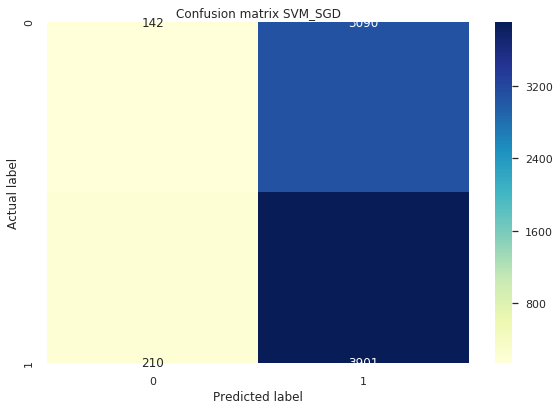

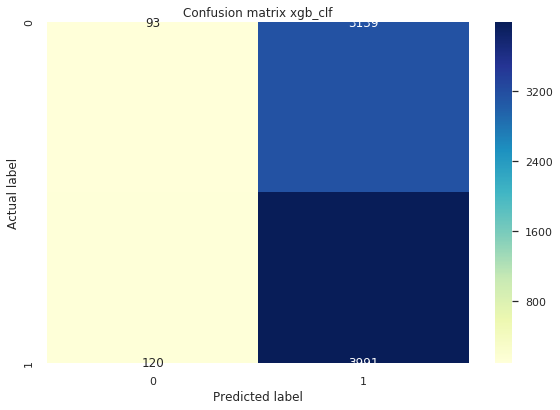

In [414]:

for key,value in dictOfPipes.items():
  pipelist.append(key) 
  build_confusion_matrix(dictOfPipes[key], key)
  print("\n")

#### Building Classifier using RandomForestClassifier